<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

_Authors: Joseph Nelson (DC), Haley Boyan (DC), Sam Stack (DC)_

---

In [13]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [14]:
seeds = pd.read_csv("./datasets/seeds.csv")

In [15]:
# A:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
area               210 non-null float64
perimeter          210 non-null float64
compactness        210 non-null float64
length             210 non-null float64
width              210 non-null float64
asymmetry_coeff    210 non-null float64
groove_length      210 non-null float64
species            210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


### 2. Do some EDA of relationships between features.

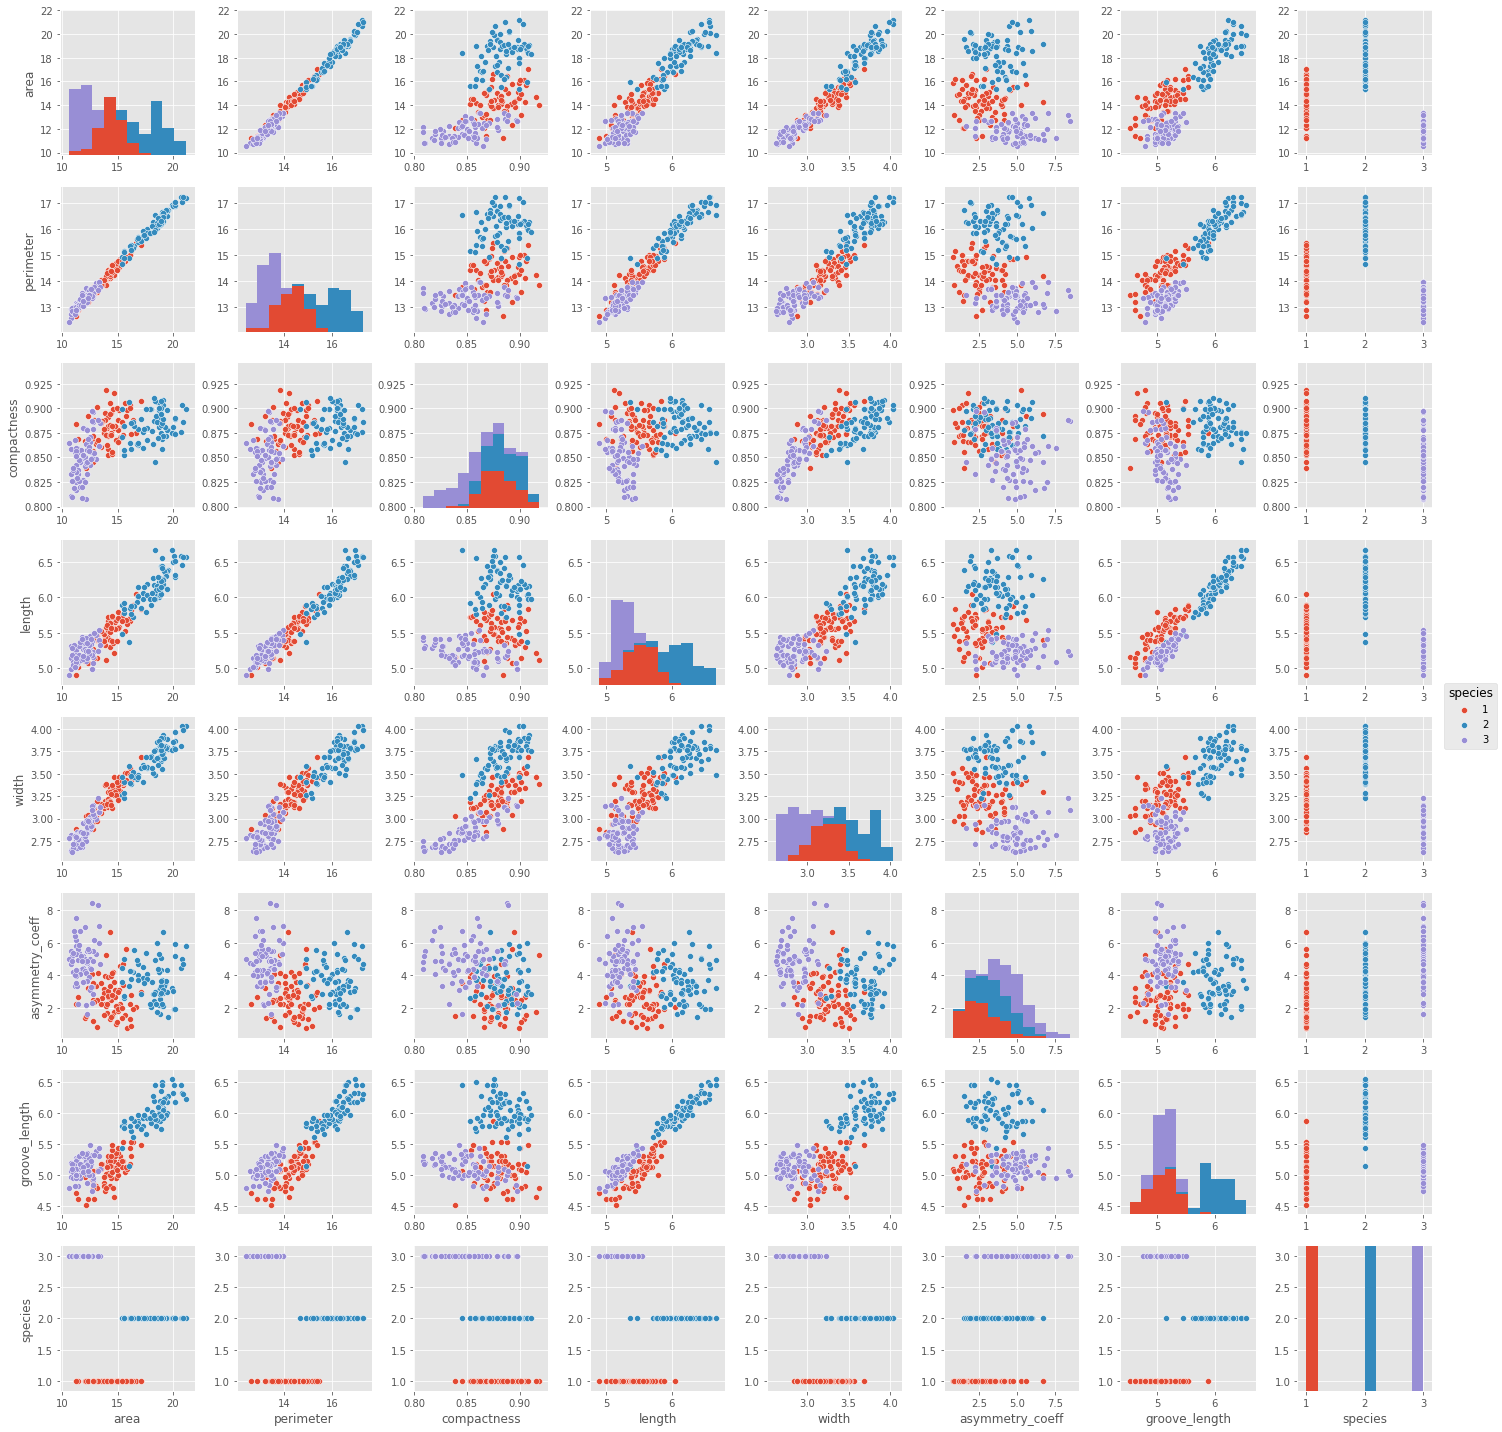

In [25]:
# Plot the Data to see the distributions/relationships
sns.pairplot(seeds, hue='species')

In [17]:
# Check for nulls
seeds.isnull().sum()

area               0
perimeter          0
compactness        0
length             0
width              0
asymmetry_coeff    0
groove_length      0
species            0
dtype: int64

In [18]:
# Look at the real species labels.
feature_space = pd.DataFrame(seeds, columns=['perimeter', 'groove_length'])
feature_space.head()

,perimeter,groove_length
0,14.84,5.220
1,14.57,4.956
2,14.09,4.825
3,13.94,4.805
4,14.99,5.175


Remember, clustering is a unsupervised learning method so known classes will never be a thing.  In this situation we can see that the `perimiter` vs. `groove_length` is a good visualization to view the proper classes class, and we can use later to compare the results of clustering to a true value.

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [19]:
# A:
df = seeds.drop(labels=['species'], axis=1)

In [20]:
df.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [21]:
from sklearn.preprocessing import StandardScaler

In [24]:
Xs = StandardScaler().fit_transform(df)
Xs.shape

(210, 7)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. However, in an actual situation in which we used clustering we would have no idea. Lets initally try using the default K for `KMeans`(8).

In [29]:
from sklearn.cluster import KMeans

In [30]:
model = KMeans(n_clusters=8, random_state=0).fit(Xs)

### 5. Get the labels and centroids out for first clustering model.

In [31]:
predicted = model.labels_
centroids = model.cluster_centers_

print "Predicted clusters to points: ", predicted
print "Location of centroids: "
print centroids

Predicted clusters to points:  [6 6 3 3 3 3 6 3 5 5 5 6 3 6 6 3 3 3 3 1 6 6 3 1 6 6 1 1 6 1 6 6 6 6 6 3 5
 5 6 7 3 6 3 5 3 6 6 3 6 6 6 5 6 6 6 6 3 3 6 1 1 1 1 1 1 3 6 6 6 1 5 5 5 4
 5 5 5 0 0 5 5 0 0 4 4 4 4 0 0 0 4 4 4 0 0 5 0 4 4 4 5 4 0 0 4 4 4 5 0 4 4
 0 4 0 0 4 4 4 4 0 0 4 5 4 3 4 0 4 4 5 4 4 5 5 5 3 5 5 5 5 7 7 7 7 2 2 1 1
 1 2 7 2 2 2 2 2 1 2 2 2 1 1 2 1 7 1 7 1 2 2 2 7 2 2 2 7 2 2 7 1 7 7 7 7 7
 2 2 2 7 7 2 1 1 2 1 7 7 7 1 3 7 3 1 7 1 1 1 7 1 7]
Location of centroids: 
[[ 1.64556535  1.66047756  0.4452605   1.71036309  1.45520743  0.62861421
   1.66067624]
 [-0.91351484 -0.9326448  -0.46027843 -0.89113498 -0.89072321 -0.30450505
  -0.82181332]
 [-1.19621321 -1.08446137 -1.87444978 -0.85268576 -1.44709243  0.83244104
  -0.50741772]
 [-0.12002128 -0.25074116  1.1570542  -0.58687469  0.26216258 -0.70521625
  -0.87634574]
 [ 1.37576173  1.33846846  0.83809979  1.27720883  1.30581757 -0.67644501
   1.33975556]
 [ 0.571446    0.63420397  0.20651071  0.62899916  0.53840009  0.1686345


In [32]:
df['predicted'] = predicted
df.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,predicted
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,6
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,6
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,3
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,3
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,3


In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))

df.plot(x="x", y="y", kind="scatter", color=df['predicted'], )#colormap='gist_rainbow', alpha=.7)
plt.scatter(centroids[:,:1], centroids[:,1:], marker='o', s=150, alpha=.7, c=range(0,3), cmap='gist_rainbow')

### 6. Compute the silouette score and visually examine the results of the 8 clusters. 

_(pairplot with hue)_

In [10]:
from sklearn.metrics import silhouette_score

# A:


### 7. Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model.

In [15]:
import random

random.randint(1,25), random.randint(1,25)

(15, 2)

In [7]:
# A:

### 8. Build a function to find the optimal number of clusters using silhouette score as the criteria.
1. Function should accept a range and a dataframe as arguments
2. Returns the optimal K value, associate silhoutte and scaling method.
3. Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, `MinMaxScaler`


Once you have found the optimal K and version of the data, visualize the clusters.





In [9]:
# A: